<a href="https://colab.research.google.com/github/DanielaCorado/Northwind/blob/main/Northwind_Traders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Influência do desconto**

**Importando os dados**

In [ ]:
import pandas as pd

order_details = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/06  - Northwind/order_details.csv", sep=";")
order_details.head()

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


**Criando a coluna faturamento**

In [ ]:
order_details["Faturamento"] = ((order_details["unit_price"]*order_details["quantity"])*(1-order_details["discount"])).round(3)
order_details

,order_id,product_id,unit_price,quantity,discount,Faturamento
0,10248,11,14.00,12,0.00,168.000
1,10248,42,9.80,10,0.00,98.000
2,10248,72,34.80,5,0.00,174.000
3,10249,14,18.60,9,0.00,167.400
4,10249,51,42.40,40,0.00,1696.000
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.505
2151,11077,66,17.00,1,0.00,17.000
2152,11077,73,15.00,2,0.01,29.700
2153,11077,75,7.75,4,0.00,31.000


In [ ]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     2155 non-null   int64  
 1   product_id   2155 non-null   int64  
 2   unit_price   2155 non-null   float64
 3   quantity     2155 non-null   int64  
 4   discount     2155 non-null   float64
 5   Faturamento  2155 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 101.1 KB


In [ ]:
order_details.describe()

,order_id,product_id,unit_price,quantity,discount,Faturamento
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167,587.374959
std,241.378032,22.159019,29.827418,19.022047,0.083450,969.224235
min,10248.000000,1.000000,2.000000,1.000000,0.000000,4.800000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000,147.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000,337.750000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000,656.000000
max,11077.000000,77.000000,263.500000,130.000000,0.250000,15810.000000


In [ ]:
sum(order_details["Faturamento"] )

1265793.0360000003

In [ ]:
import numpy as np

**Criando coluna sobre o disconto**

In [ ]:
order_details["have_discount"] = np.where(order_details["discount"] == 0 , "no_discount","with_discount")
order_details

,order_id,product_id,unit_price,quantity,discount,Faturamento,have_discount
0,10248,11,14.00,12,0.00,168.000,no_discount
1,10248,42,9.80,10,0.00,98.000,no_discount
2,10248,72,34.80,5,0.00,174.000,no_discount
3,10249,14,18.60,9,0.00,167.400,no_discount
4,10249,51,42.40,40,0.00,1696.000,no_discount
...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.505,with_discount
2151,11077,66,17.00,1,0.00,17.000,no_discount
2152,11077,73,15.00,2,0.01,29.700,with_discount
2153,11077,75,7.75,4,0.00,31.000,no_discount


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Dataframe com desconto**

In [ ]:
com_desconto = (order_details["discount"]!=0)
order_details_with_discount = order_details[com_desconto]
order_details_with_discount

,order_id,product_id,unit_price,quantity,discount,Faturamento,have_discount
6,10250,51,42.40,35,0.15,1261.400,with_discount
7,10250,65,16.80,15,0.15,214.200,with_discount
8,10251,22,16.80,6,0.05,95.760,with_discount
9,10251,57,15.60,15,0.05,222.300,with_discount
11,10252,20,64.80,40,0.05,2462.400,with_discount
...,...,...,...,...,...,...,...
2144,11077,39,18.00,2,0.05,34.200,with_discount
2146,11077,46,12.00,3,0.02,35.280,with_discount
2149,11077,60,34.00,2,0.06,63.920,with_discount
2150,11077,64,33.25,2,0.03,64.505,with_discount


**Dataframe sem desconto**

In [ ]:
sem_desconto = (order_details["discount"]==0)
order_details_no_discount = order_details[sem_desconto]
order_details_no_discount

,order_id,product_id,unit_price,quantity,discount,Faturamento,have_discount
0,10248,11,14.00,12,0.0,168.0,no_discount
1,10248,42,9.80,10,0.0,98.0,no_discount
2,10248,72,34.80,5,0.0,174.0,no_discount
3,10249,14,18.60,9,0.0,167.4,no_discount
4,10249,51,42.40,40,0.0,1696.0,no_discount
...,...,...,...,...,...,...,...
2147,11077,52,7.00,2,0.0,14.0,no_discount
2148,11077,55,24.00,2,0.0,48.0,no_discount
2151,11077,66,17.00,1,0.0,17.0,no_discount
2153,11077,75,7.75,4,0.0,31.0,no_discount


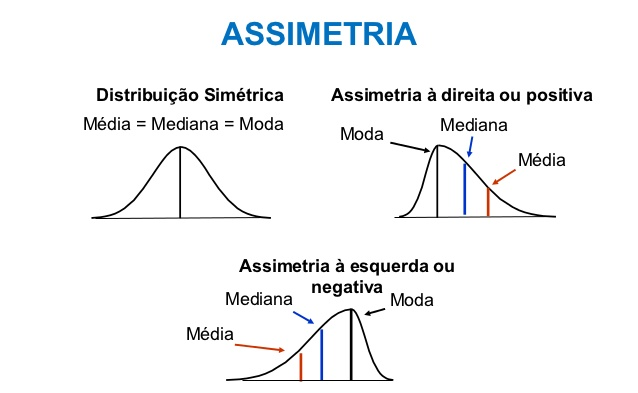

**Comparando a distribuição do faturamento de acordo com desconto**

<Figure size 1440x1440 with 0 Axes>

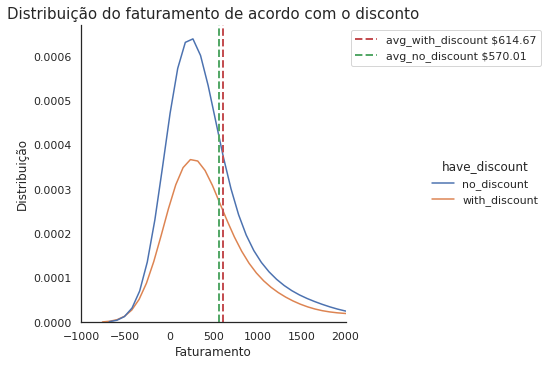

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(20,20))
ax = sns.displot(data=order_details, x= 'Faturamento', hue="have_discount", kind="kde")
plt.axvline(order_details_with_discount['Faturamento'].mean(), color='r', linestyle='--', linewidth=2, label = ('avg_with_discount' + " " + "$" + str(order_details_with_discount['Faturamento'].mean().round(2))))
plt.axvline(order_details_no_discount['Faturamento'].mean(), color='g', linestyle='--', linewidth=2, label = ('avg_no_discount' + " " + "$" + str(order_details_no_discount['Faturamento'].mean().round(2))))
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.title("Distribuição do faturamento de acordo com o disconto", fontsize=15)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('Faturamento', fontsize = 12)
plt.xlim((-1000,2000))
plt.show()



*  Média de gastos dos clientes com desconto é maior

<Figure size 1440x1440 with 0 Axes>

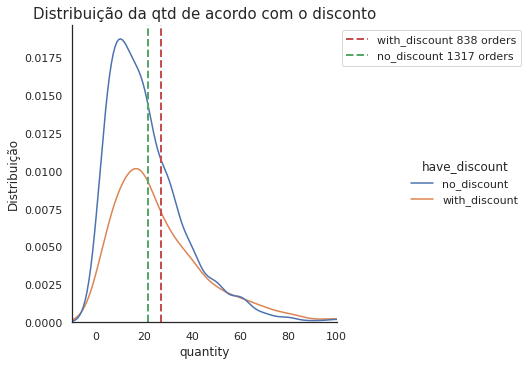

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(20,20))
ax = sns.displot(data=order_details, x= 'quantity', hue="have_discount", kind="kde")
plt.axvline(order_details_with_discount['quantity'].mean(), color='r', linestyle='--', linewidth=2, label = ('with_discount' + " "  + str(order_details_with_discount['quantity'].count().round(2))+" orders"))
plt.axvline(order_details_no_discount['quantity'].mean(), color='g', linestyle='--', linewidth=2, label = ('no_discount' + " "  + str(order_details_no_discount['quantity'].count().round(2)) + " orders"))
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.title("Distribuição da qtd de acordo com o disconto", fontsize=15)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('quantity', fontsize = 12)
plt.xlim((-10,100))
plt.show()




* 61,11 % dos pedidos nunca receberam um desconto

**Distribuição da quantidade de vendas sem disconto**

<Figure size 720x576 with 0 Axes>

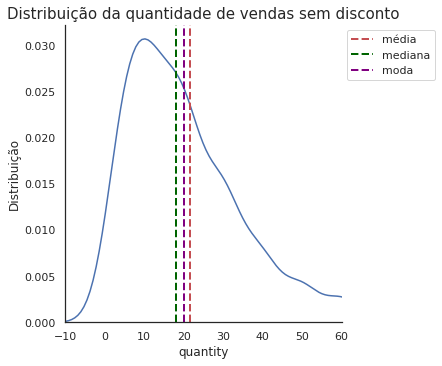

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
moda = order_details_no_discount['quantity'].mode()
ax = sns.displot(data = order_details_no_discount, x = "quantity", kind="kde")
plt.axvline(order_details_no_discount['quantity'].mean(), color='r', linestyle='--', linewidth=2,label = 'média')
plt.axvline(order_details_no_discount['quantity'].median(), color='darkgreen', linestyle='--', linewidth=2,label = 'mediana')
plt.axvline(moda[0], color='purple', linestyle='--', linewidth=2,label = 'moda')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

plt.title("Distribuição da quantidade de vendas sem disconto", fontsize=15)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('quantity', fontsize = 12)
plt.xlim((-10,60))
plt.show()


In [ ]:
order_details_no_discount['quantity'].skew()

1.9137792503838034

<Figure size 720x576 with 0 Axes>

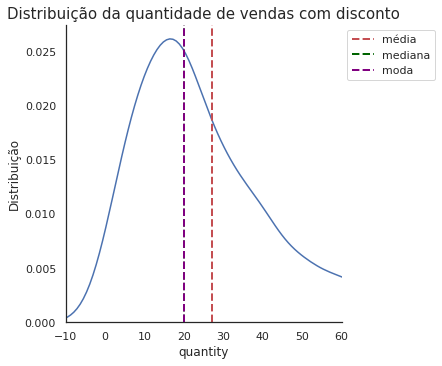

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
moda = order_details_with_discount['quantity'].mode()
ax = sns.displot(data = order_details_with_discount, x = "quantity", kind="kde")
plt.axvline(order_details_with_discount['quantity'].mean(), color='r', linestyle='--', linewidth=2,label = 'média')
plt.axvline(order_details_with_discount['quantity'].median(), color='darkgreen', linestyle='--', linewidth=2,label = 'mediana')
plt.axvline(moda[0], color='purple', linestyle='--', linewidth=2,label = 'moda')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.title("Distribuição da quantidade de vendas com disconto", fontsize=15)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('quantity', fontsize = 12)
plt.xlim((-10,60))
plt.show()

In [ ]:
order_details_with_discount['quantity'].skew()

1.5844102028462037

**Teste de hipótese**

In [ ]:
from scipy import stats

In [ ]:
pvalue = stats.ttest_ind(order_details_no_discount.quantity,
                         order_details_with_discount.quantity)
pvalue

Ttest_indResult(statistic=-6.4785631962949015, pvalue=1.1440924523215966e-10)

In [ ]:
def cohen_d (group1, group2) :
  diff= group1.mean() - group2.mean()

  n1,n2 =  len(group1), len(group2)
  var1 = group1.var()
  var2 = group2.var()

  pooled_var = (n1*var1 + n2*var2)/(n1 + n2)
  d = diff/np.sqrt(pooled_var)
  return d

In [ ]:
cohen_d (order_details_with_discount['quantity'], 
         order_details_no_discount['quantity'])

0.2862724481729282

**Tipos de disconto**

Text(0.5, 1.0, 'Boxplot dos discontos de acordo com a qtd')

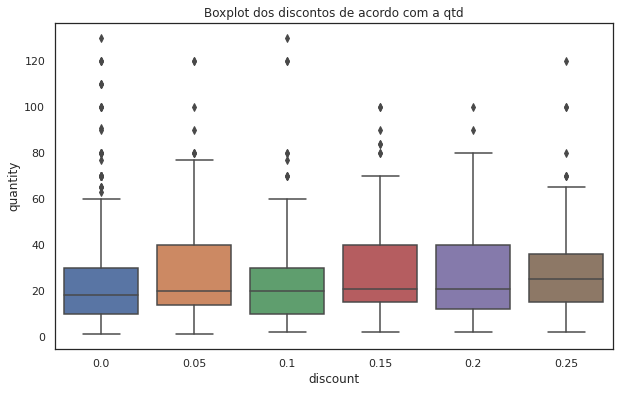

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="discount", y = "quantity", data = order_details.query("discount != 0.06 & discount!=  0.01 & discount  !=  0.02 & discount  !=  0.03 & discount  !=  0.04 "))
plt.title("Boxplot dos discontos de acordo com a qtd")

Text(0.5, 1.0, 'Boxplot dos discontos de acordo com o faturamento')

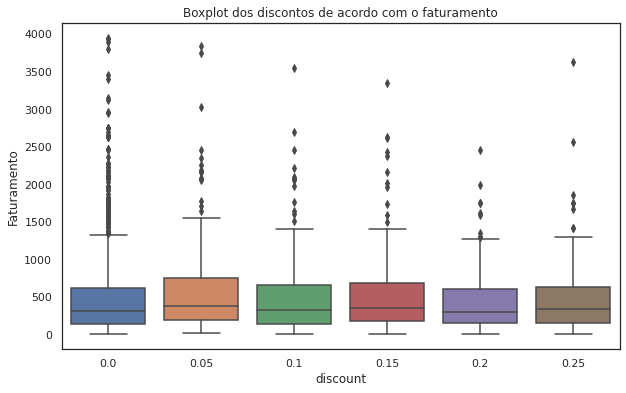

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="discount", y = "Faturamento", data = order_details.query("discount != 0.06 & discount!=  0.01 & discount  !=  0.02 & discount  !=  0.03 & discount  !=  0.04 & Faturamento < 4000 "))
plt.title("Boxplot dos discontos de acordo com o faturamento")

**Teste Anova**

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
import statsmodels.api as sm


In [ ]:
order_details_with_discount = order_details_with_discount.drop(columns="have_discount")

In [ ]:
x = order_details_with_discount["quantity"]
y = order_details_with_discount["discount"]
x_cont = sm.add_constant(x)
lm = sm.OLS(y, x_cont).fit()
lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8847
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.347
Time:                        15:34:49   Log-Likelihood:                 1019.0
No. Observations:                 838   AIC:                            -2034.
Df Residuals:                     836   BIC:                            -2024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1414      0.004     34.652      0.0

In [ ]:
lm.fvalue

0.8847270805667583

In [ ]:
lm.f_pvalue

0.34718192861871044

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = "quantity ~ discount"
lm = smf.ols(formula, order_details_with_discount).fit()
result = sm.stats.anova_lm(lm, typ=2)
result

,sum_sq,df,F,PR(>F)
discount,381.770455,1.0,0.884727,0.347182
Residual,360744.129306,836.0,NaN,NaN


# **Desconto por categoria**


In [ ]:
produtos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/06  - Northwind/products.csv", sep=";")
produtos.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [ ]:
categorias = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/06  - Northwind/categories.csv", sep=";")
categorias.head()

,category_id,category_name,description,picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",\x
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",\x
2,3,Confections,"Desserts, candies, and sweet breads",\x
3,4,Dairy Products,Cheeses,\x
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",\x


In [ ]:
m = pd.merge(order_details, produtos , how = 'inner', on = 'product_id')
m

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,have_discount,product_name,supplier_id,category_id,quantity_per_unit,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued
0,10248,11,14.0,12,0.00,168.00,no_discount,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
1,10296,11,16.8,12,0.00,201.60,no_discount,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
2,10327,11,16.8,50,0.20,672.00,with_discount,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
3,10353,11,16.8,12,0.20,161.28,with_discount,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
4,10365,11,16.8,24,0.00,403.20,no_discount,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10420,9,77.6,20,0.10,1396.80,with_discount,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.0,29,0,0,1
2151,10515,9,97.0,16,0.15,1319.20,with_discount,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.0,29,0,0,1
2152,10687,9,97.0,50,0.25,3637.50,with_discount,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.0,29,0,0,1
2153,10693,9,97.0,6,0.00,582.00,no_discount,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.0,29,0,0,1


In [ ]:
m2 = pd.merge(m, categorias , how = 'inner', on = 'category_id')


In [ ]:
produtos_categorias = m2.drop(['have_discount','product_name','quantity_per_unit','description','picture'],axis=1)

In [ ]:
produtos_categorias 

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
0,10248,11,14.0,12,0.00,168.00,5,4,21.0,22,30,30,0,Dairy Products
1,10296,11,16.8,12,0.00,201.60,5,4,21.0,22,30,30,0,Dairy Products
2,10327,11,16.8,50,0.20,672.00,5,4,21.0,22,30,30,0,Dairy Products
3,10353,11,16.8,12,0.20,161.28,5,4,21.0,22,30,30,0,Dairy Products
4,10365,11,16.8,24,0.00,403.20,5,4,21.0,22,30,30,0,Dairy Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10420,9,77.6,20,0.10,1396.80,4,6,97.0,29,0,0,1,Meat/Poultry
2151,10515,9,97.0,16,0.15,1319.20,4,6,97.0,29,0,0,1,Meat/Poultry
2152,10687,9,97.0,50,0.25,3637.50,4,6,97.0,29,0,0,1,Meat/Poultry
2153,10693,9,97.0,6,0.00,582.00,4,6,97.0,29,0,0,1,Meat/Poultry


In [ ]:
produtos_categorias['discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.06       1
0.01       1
0.04       1
Name: discount, dtype: int64

In [ ]:
produtos_categorias.loc[produtos_categorias['discount'] == 0.02]

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
968,11077,46,12.0,3,0.02,35.28,21,8,12.0,95,0,0,0,Seafood
1206,11077,6,25.0,1,0.02,24.50,3,2,25.0,120,0,25,0,Condiments


In [ ]:
produtos_categorias.loc[produtos_categorias['discount'] == 0.03]

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
512,11077,64,33.25,2,0.03,64.505,12,5,33.25,22,80,30,0,Grains/Cereals
583,11077,14,23.25,1,0.03,22.552,6,7,23.25,35,0,0,0,Produce
1323,11077,16,17.45,2,0.03,33.853,7,3,17.45,29,0,10,0,Confections


In [ ]:
produtos_categorias.loc[produtos_categorias['discount'] == 0.04]

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
1259,11077,20,81.0,1,0.04,77.76,8,3,81.0,40,0,0,0,Confections


In [ ]:
produtos_categorias.loc[produtos_categorias['discount'] == 0.06]

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
158,11077,60,34.0,2,0.06,63.92,28,4,34.0,19,0,0,0,Dairy Products


In [ ]:
produtos_categorias.loc[produtos_categorias['discount'] == 0.01]

,order_id,product_id,unit_price_x,quantity,discount,Faturamento,supplier_id,category_id,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,category_name
941,11077,73,15.0,2,0.01,29.7,17,8,15.0,101,0,5,0,Seafood


In [ ]:
produtos_categorias_filtro = produtos_categorias.drop(index=[158,1259,1323,583,512,968,941,1206])

In [ ]:
produtos_categorias_filtro['discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: discount, dtype: int64

In [ ]:
formula = "quantity ~ category_name * discount"
lm_pord = smf.ols(formula, produtos_categorias_filtro).fit()
result = sm.stats.anova_lm(lm_pord, typ=2)
result

,sum_sq,df,F,PR(>F)
category_name,1228.870156,7.0,0.492989,8.402648e-01
discount,12626.353706,1.0,35.457423,3.040989e-09
category_name:discount,2790.282042,7.0,1.119384,3.477783e-01
Residual,758847.029423,2131.0,NaN,NaN


In [ ]:
lm_pord.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               quantity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.115
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.65e-05
Time:                        15:35:04   Log-Likelihood:                -9345.5
No. Observations:                2147   AIC:                         1.872e+04
Df Residuals:                    2131   BIC:                         1.881e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   22.0194      1.147     19.195      0.000      19.770      24.269
category_name[T.Condiments]                  0.4119      1.932      0.213      0.831      -3.376       4.200
category_name[T.Confections]                 1.0262      1.700      0.604      0.546      -2.308       4.360
category_name[T.Dairy Products]              0.6031      1.648      0.366      0.715      -2.630       3.836
category_name[T.Grains/Cereals]              0.8337      1.939      0.430      0.667      -2.968       4.635
category_name[T.Meat/Poultry]               -1.1073      2.114     -0.524      0.600      -5.252       3.037
category_name[T.Produce]                    -0.4541      2.208     -0.206      0.837      -4.784       3.876
category_name[T.Seafood]                    -0.2424      1.714     -0.141      0.888      -3.604       3.120
discount                                    25.4459     10.653      2.389      0.017       4.555      46.337
category_name[T.Condiments]:discount        16.3385     19.638      0.832      0.406     -22.174      54.851
category_name[T.Confections]:discount      -12.1565     16.358     -0.743      0.457     -44.235      19.922
category_name[T.Dairy Products]:discount    20.1842     16.205      1.246      0.213     -11.594      51.963
category_name[T.Grains/Cereals]:discount   -13.7348     20.310     -0.676      0.499     -53.565      26.095
category_name[T.Meat/Poultry]:discount      26.6792     19.404      1.375      0.169     -11.373      64.731
category_name[T.Produce]:discount          -12.8147     23.607     -0.543      0.587     -59.111      33.481
category_name[T.Seafood]:discount            1.4114     16.132      0.087      0.930     -30.225      33.048
==============================================================================
Omnibus:                      795.048   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3184.504
Skew:                           1.786   Prob(JB):                         0.00
Kurtosis:                       7.779   Cond. No.                         87.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

<Figure size 720x576 with 0 Axes>

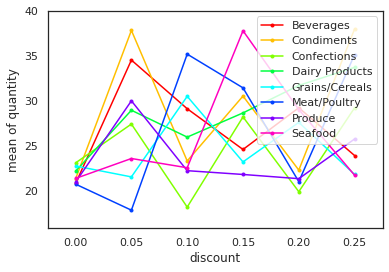

In [ ]:
plt.figure(figsize=(10, 8))
fig = interaction_plot(produtos_categorias_filtro['discount'], produtos_categorias_filtro['category_name'],
                       produtos_categorias_filtro['quantity'])
plt.legend(loc=1) 


# **Avaliando os paises**

In [ ]:
clientes= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/06  - Northwind/customers.csv", sep=";")
clientes.head()

,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [ ]:
orders = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/06  - Northwind/orders.csv", sep=";")
orders.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [ ]:
cleiente_orders= pd.merge(orders , clientes , how = 'inner', on = 'customer_id')
cleiente_orders

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,...,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
1,10274,VINET,6,1996-08-06,1996-09-03,1996-08-16,1,6.01,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
2,10295,VINET,2,1996-09-02,1996-09-30,1996-09-10,2,1.15,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
3,10737,VINET,2,1997-11-11,1997-12-09,1997-11-18,2,7.79,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
4,10739,VINET,3,1997-11-12,1997-12-10,1997-11-17,3,11.08,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11043,SPECD,5,1998-04-22,1998-05-20,1998-04-29,2,8.80,Spécialités du monde,"25, rue Lauriston",...,Spécialités du monde,Dominique Perrier,Marketing Manager,"25, rue Lauriston",Paris,NaN,75016,France,(1) 47.55.60.10,(1) 47.55.60.20
826,10858,LACOR,2,1998-01-29,1998-02-26,1998-02-03,1,52.51,La corne d'abondance,"67, avenue de l'Europe",...,La corne d'abondance,Daniel Tonini,Sales Representative,"67, avenue de l'Europe",Versailles,NaN,78000,France,30.59.84.10,30.59.85.11
827,10927,LACOR,4,1998-03-05,1998-04-02,1998-04-08,1,19.79,La corne d'abondance,"67, avenue de l'Europe",...,La corne d'abondance,Daniel Tonini,Sales Representative,"67, avenue de l'Europe",Versailles,NaN,78000,France,30.59.84.10,30.59.85.11
828,10972,LACOR,4,1998-03-24,1998-04-21,1998-03-26,2,0.02,La corne d'abondance,"67, avenue de l'Europe",...,La corne d'abondance,Daniel Tonini,Sales Representative,"67, avenue de l'Europe",Versailles,NaN,78000,France,30.59.84.10,30.59.85.11


In [ ]:
cleiente_orders_detalhes = pd.merge(order_details, cleiente_orders , how = 'inner', on = 'order_id')
cleiente_orders_detalhes

,order_id,product_id,unit_price,quantity,discount,Faturamento,have_discount,customer_id,employee_id,order_date,...,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,10248,11,14.00,12,0.00,168.000,no_discount,VINET,5,1996-07-04,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
1,10248,42,9.80,10,0.00,98.000,no_discount,VINET,5,1996-07-04,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
2,10248,72,34.80,5,0.00,174.000,no_discount,VINET,5,1996-07-04,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
3,10249,14,18.60,9,0.00,167.400,no_discount,TOMSP,6,1996-07-05,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,NaN,44087,Germany,0251-031259,0251-035695
4,10249,51,42.40,40,0.00,1696.000,no_discount,TOMSP,6,1996-07-05,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,NaN,44087,Germany,0251-031259,0251-035695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.505,with_discount,RATTC,1,1998-05-06,...,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,Albuquerque,NM,87110,USA,(505) 555-5939,(505) 555-3620
2151,11077,66,17.00,1,0.00,17.000,no_discount,RATTC,1,1998-05-06,...,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,Albuquerque,NM,87110,USA,(505) 555-5939,(505) 555-3620
2152,11077,73,15.00,2,0.01,29.700,with_discount,RATTC,1,1998-05-06,...,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,Albuquerque,NM,87110,USA,(505) 555-5939,(505) 555-3620
2153,11077,75,7.75,4,0.00,31.000,no_discount,RATTC,1,1998-05-06,...,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,Albuquerque,NM,87110,USA,(505) 555-5939,(505) 555-3620


In [ ]:
formula = "Faturamento	 ~ country"
lm_pord = smf.ols(formula, cleiente_orders_detalhes).fit()
result = sm.stats.anova_lm(lm_pord, typ=2)
result

,sum_sq,df,F,PR(>F)
country,7.269544e+07,20.0,3.97619,7.308168e-09
Residual,1.950763e+09,2134.0,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

In [ ]:
mod = pairwise_tukeyhsd(cleiente_orders_detalhes.Faturamento	,cleiente_orders_detalhes.country)
print(mod)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
  Argentina     Austria  785.2336  0.004    124.325 1446.1423   True
  Argentina     Belgium  365.2182    0.9  -377.6728 1108.1092  False
  Argentina      Brazil  287.9309    0.9  -345.2445  921.1063  False
  Argentina      Canada  430.4868 0.8043  -275.9617 1136.9353  False
  Argentina     Denmark  471.2252 0.8034  -301.5692 1244.0196  False
  Argentina     Finland  109.5372    0.9  -638.5329  857.6074  False
  Argentina      France  203.3677    0.9  -434.4803  841.2158  False
  Argentina     Germany  463.2902 0.4644  -152.3333 1078.9138  False
  Argentina     Ireland  669.9285 0.1466   -75.5095 1415.3665  False
  Argentina       Italy    58.753    0.9  -692.0388  809.5449  False
  Argentina      Mexico   88.7318    0.9  -622.2927  799.7563  False
  Argentina      Norway  119.6498 